In [ ]:
# SVD from scratch
import numpy as np

# Step 1: Define a Matrix
A = np.array([[3, 1, 1], [-1, 3, 1]])

# Step 2: Compute A_T @ A and A @ A_T
A_T_A = A.T @ A
A_A_T = A @ A.T

# Step 3: Eigen decomposition of A_T @ A and A @ A_T
# A_T @ A = (UZV.T).T @ UZV.T => V = 
# A @ A_T = UZV.T @ (UZV.T).T
eigvals_V, V = np.linalg.eigh(A_T_A)
eigvals_U, U = np.linalg.eigh(A_A_T)

# Step 4: Sort the eigenvalues and vectors in descending order
sorted_indices_V = np.argsort(eigvals_V)[::-1]
V = V[:, sorted_indices_V]
eigvals_V = eigvals_V[sorted_indices_V]

sorted_indices_U = np.argsort(eigvals_U)[::-1]
U = U[:, sorted_indices_U]
eigvals_U = eigvals_U[sorted_indices_U]

# Step 5: Compute singular values (square roots of eigenvalues)
# Use the non-zero eigenvalues of A^T A (or A A^T)
singular_vals = np.sqrt(eigvals_V)

# Step 6: Create  Z (sigma) matrix with singular values
Sigma = np.zeros_like(A, dtype=float)
np.fill_diagonal(Sigma, singular_vals)

# Step 7: Reconstruct A using U @ Z @ V.T
A_reconstructed = U @ Sigma @ V.T

# Output
print("Original A: \n", A)
print("U Matrix: \n", U)
print("Sigma Matrix: ", Sigma)
print("V^T Matrix", V.T)
print("\n Reconstructed A (UZV.T):", A_reconstructed)


Original A: 
 [[ 3  1  1]
 [-1  3  1]]
U Matrix: 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Sigma Matrix:  [[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]
V^T Matrix [[ 4.08248290e-01  8.16496581e-01  4.08248290e-01]
 [ 8.94427191e-01 -4.47213595e-01  2.22044605e-16]
 [ 1.82574186e-01  3.65148372e-01 -9.12870929e-01]]

 Reconstructed A (UZV.T): [[-1.  3.  1.]
 [ 3.  1.  1.]]


/var/folders/m9/j9s4np6n4093jb6mgddz4btw0000gn/T/ipykernel_37081/3936220285.py:29: RuntimeWarning: invalid value encountered in sqrt
  singular_vals = np.sqrt(eigvals_V)


In [14]:
import numpy as np

# Step 1: Define a Matrix
A = np.array([[3, 1, 1], [-1, 3, 1]])

# Step 2: Compute A^T A 
A_T_A = A.T @ A

# Step 3: EigenDecomposition of A^T A for V
eigvals, V = np.linalg.eigh(A_T_A)

# Step 4: Sort Eigen values and Eigen Vectors
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
V = V[:, sorted_indices]

# Step 5: Compute Singular Values
singular_vals = np.sqrt(np.clip(eigvals, a_min=0, a_max=None))

# Step 6: Compute U using A V / Z
U = (A @ V[:, :2]) / singular_vals[:2]# Broadcasts for each column

# Step 7: Construct Z (same shape as A)
Sigma = np.zeros((2, 3))
np.fill_diagonal(Sigma, singular_vals[:2])

# Step 8: Reconstruct A
A_reconstructed = U @ Sigma @ V.T 

print(A)
print(A_reconstructed)


[[ 3  1  1]
 [-1  3  1]]
[[ 3.  1.  1.]
 [-1.  3.  1.]]


In [13]:
import numpy as np

# Step 1: Define a Matrix
A = np.array([[3, 1, 1], [-1, 3, 1]])

# Step 2: Compute A^T A
A_T_A = A.T @ A

# Step 3: Eigendecomposition of A^T A for V
eigvals, V = np.linalg.eigh(A_T_A)

# Step 4: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
V = V[:, sorted_indices]

# Step 5: Compute singular values (avoid negatives due to rounding)
singular_vals = np.sqrt(np.clip(eigvals, a_min=0, a_max=None))

# Step 6: Compute U using A V / σ
U = (A @ V[:, :2]) / singular_vals[:2]

# Step 7: Construct Σ (same shape as A)
Sigma = np.zeros((2, 3))
np.fill_diagonal(Sigma, singular_vals[:2])

# Step 8: Reconstruct A
A_reconstructed = U @ Sigma @ V.T

# Output
print("Original A: \n", A)
print("U Matrix: \n", U)
print("Sigma Matrix: \n", Sigma)
print("V^T Matrix: \n", V.T)
print("\nReconstructed A: \n", A_reconstructed)

Original A: 
 [[ 3  1  1]
 [-1  3  1]]
U Matrix: 
 [[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
Sigma Matrix: 
 [[3.46410162 0.         0.        ]
 [0.         3.16227766 0.        ]]
V^T Matrix: 
 [[ 4.08248290e-01  8.16496581e-01  4.08248290e-01]
 [ 8.94427191e-01 -4.47213595e-01  2.22044605e-16]
 [ 1.82574186e-01  3.65148372e-01 -9.12870929e-01]]

Reconstructed A: 
 [[ 3.  1.  1.]
 [-1.  3.  1.]]


Silhouette score:  0.5964321528731893


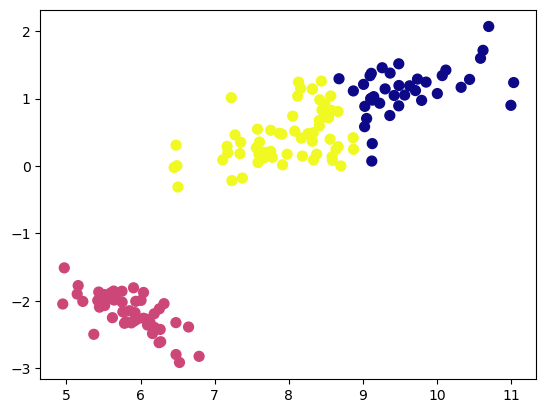

In [15]:
from sklearn.datasets import load_iris 
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y = load_iris(return_X_y=True)

svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_svd)

score = silhouette_score(X_svd, labels)
print("Silhouette score: ", score)

plt.scatter(X_svd[:,0], X_svd[:,1], c=labels, cmap='plasma', s=50)

In [21]:
import numpy as np

A = np.array([[3, 1,1 ], [-1, 3, 1]])

A_T_A = A.T @ A

eigvals, V = np.linalg.eigh(A_T_A)

sorted_indices = np.argsort(eigvals)[::-1]
eigvals = eigvals[sorted_indices]
V = V[:, sorted_indices]

singular_vals = np.sqrt(np.clip(eigvals, 0, None))

U = (A @ V[:,:2]) / singular_vals[:2]

Sigma = np.zeros((2, 3))
np.fill_diagonal(Sigma, singular_vals[:2])

A_reconstructed = U @ Sigma @ V.T

print("A: ", A)
print("A_reconstructed", A_reconstructed)

A:  [[ 3  1  1]
 [-1  3  1]]
A_reconstructed [[ 3.  1.  1.]
 [-1.  3.  1.]]
